# WeatherPy
----

### Analysis
* There is a noticeable correlation between temperature and latitude, unsurprisingly. However, the Northern utmost latitudes see a larger decrease in temperature than the Antarctic latitudes. The earth's curvature could be to blame.
* Latitude does not really play that much of a role in determining the wind speed of a given latitudinal region. There does not seem to be a noticeable correlation with the data.
* Latitude does not also play a role in determining the average humidity for a given latitudinal region. There are other factors to suspect in this case, such as ocean currents/average precipitation per year, etc.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat = []
long = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        lat.append(lat_lng[0])
        long.append(lat_lng[1])
# Print the city count to confirm sufficient count
len(cities)
city_weather_df = pd.DataFrame({'City': cities, 'Latitude': lat, 'Longitude': long})
city_weather_df

,City,Latitude,Longitude
0,albany,-84.762175,92.721265
1,clyde river,67.575773,-73.608821
2,rikitea,-34.963048,-123.357574
3,buqayq,24.799675,49.584849
4,hobart,-58.942661,153.467113
5,doha,29.652710,45.168250
6,kapaa,29.235743,-165.041762
7,sao filipe,7.238282,-31.905781
8,saskylakh,81.300042,108.861641
9,olecko,54.066835,22.412907


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
# Base url for finding cities' weather
base_url = "https://api.openweathermap.org/data/2.5/weather?"

params = {'appid': api_key}

row_count = 0

print("Beginning Data Retrieval for Cities")
print("-----------------------------------------------")


for index, row in city_weather_df.iterrows():
    city = row['City']
    lat = row['Latitude']
    lon = row['Longitude']
    
    
    # Add latitude and longitude parameters
    # for current row
    params['q'] = city
    
    print(f'Processing Record {row_count}: {city}. ')
    row_count += 1
    
    city_weather = requests.get(base_url, params=params).json()

    
    # Append temp, humidity, cloudiness, and wind speed
    # to the dataframe using try/except
    
    try:
        temp = city_weather['main']['temp']
        humidity = city_weather['main']['humidity']
        cloudy = city_weather['clouds']['all']
        wind = city_weather['wind']['speed']
        
        city_weather_df.loc[index, 'latitude'] = city_weather['coord']['lat']
        city_weather_df.loc[index, 'longitude'] = city_weather['coord']['lon']
        city_weather_df.loc[index, 'temperature'] = temp
        city_weather_df.loc[index, 'humidity'] = humidity
        city_weather_df.loc[index, 'cloudiness'] = cloudy
        city_weather_df.loc[index, 'wind_speed'] = wind
        
    except:
        print("Error with city data. Skipping...")
        
        city_weather_df.drop(labels=index, inplace=True)
        

Beginning Data Retrieval for Cities
-----------------------------------------------
Processing Record 0: albany. 
Processing Record 1: clyde river. 
Processing Record 2: rikitea. 
Processing Record 3: buqayq. 
Error with city data. Skipping...
Processing Record 4: hobart. 
Processing Record 5: doha. 
Processing Record 6: kapaa. 
Processing Record 7: sao filipe. 
Processing Record 8: saskylakh. 
Processing Record 9: olecko. 
Processing Record 10: busselton. 
Processing Record 11: whyalla. 
Processing Record 12: olafsvik. 
Error with city data. Skipping...
Processing Record 13: tonstad. 
Processing Record 14: pochutla. 
Processing Record 15: saleaula. 
Error with city data. Skipping...
Processing Record 16: lagoa. 
Processing Record 17: fort nelson. 
Processing Record 18: tiksi. 
Processing Record 19: cape town. 
Processing Record 20: henties bay. 
Processing Record 21: geraldton. 
Processing Record 22: dikson. 
Processing Record 23: orotukan. 
Processing Record 24: pawai. 
Processing Re

Processing Record 215: ribeira grande. 
Processing Record 216: hami. 
Processing Record 217: mogadishu. 
Processing Record 218: ransang. 
Error with city data. Skipping...
Processing Record 219: uznach. 
Processing Record 220: sagarejo. 
Processing Record 221: lensk. 
Processing Record 222: sawakin. 
Processing Record 223: saint anthony. 
Processing Record 224: dawlatabad. 
Processing Record 225: faanui. 
Processing Record 226: laguna. 
Processing Record 227: mutis. 
Processing Record 228: lebu. 
Processing Record 229: zimovniki. 
Processing Record 230: caravelas. 
Processing Record 231: bairnsdale. 
Processing Record 232: sisimiut. 
Processing Record 233: tiguib. 
Processing Record 234: constitucion. 
Processing Record 235: kijang. 
Processing Record 236: amarillo. 
Processing Record 237: port-gentil. 
Processing Record 238: sapao. 
Error with city data. Skipping...
Processing Record 239: havelock. 
Processing Record 240: coihaique. 
Processing Record 241: harnosand. 
Processing Recor

Processing Record 434: chifeng. 
Processing Record 435: puerto del rosario. 
Processing Record 436: parakou. 
Processing Record 437: paamiut. 
Processing Record 438: maloshuyka. 
Error with city data. Skipping...
Processing Record 439: thunder bay. 
Processing Record 440: santiago del estero. 
Processing Record 441: illapel. 
Processing Record 442: nanortalik. 
Processing Record 443: tabiauea. 
Error with city data. Skipping...
Processing Record 444: inhambane. 
Processing Record 445: mandalgovi. 
Processing Record 446: sechura. 
Processing Record 447: lugovskiy. 
Error with city data. Skipping...
Processing Record 448: san ignacio. 
Processing Record 449: hamilton. 
Processing Record 450: trabzon. 
Processing Record 451: airai. 
Processing Record 452: manggar. 
Processing Record 453: oxbow. 
Processing Record 454: port hueneme. 
Processing Record 455: genhe. 
Processing Record 456: sibi. 
Processing Record 457: vao. 
Processing Record 458: lake charles. 
Processing Record 459: sorong.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
city_weather_df.to_csv('csv/zip_city_weather.csv', encoding='utf-8', index=False)

In [26]:
city_weather_df

,City,Latitude,Longitude,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,albany,-84.762175,92.721265,42.65,-73.75,267.400,70.0,75.0,2.60
1,clyde river,67.575773,-73.608821,70.47,-68.59,245.150,68.0,1.0,2.10
2,rikitea,-34.963048,-123.357574,-23.12,-134.97,299.042,98.0,88.0,6.62
4,hobart,-58.942661,153.467113,-42.88,147.33,289.150,63.0,75.0,1.00
5,doha,29.652710,45.168250,25.29,51.53,292.730,56.0,0.0,1.50
6,kapaa,29.235743,-165.041762,22.08,-159.32,299.350,53.0,75.0,9.30
7,sao filipe,7.238282,-31.905781,14.90,-24.50,297.267,97.0,0.0,5.12
8,saskylakh,81.300042,108.861641,71.97,114.09,249.792,70.0,44.0,1.57
9,olecko,54.066835,22.412907,54.04,22.49,277.017,94.0,88.0,8.27
10,busselton,-79.807472,79.986384,-33.64,115.35,290.567,100.0,0.0,7.27


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

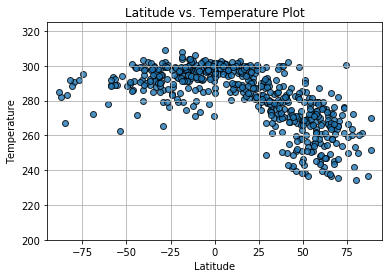

In [48]:
plt.scatter(city_weather_df['Latitude'], city_weather_df['temperature'], edgecolor='black', linewidths=1, alpha=0.8)
plt.xlim(-95, 95)
plt.ylim(200, 325)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature Plot")
plt.savefig('Images/latvstemp.png')

#### Latitude vs. Humidity Plot

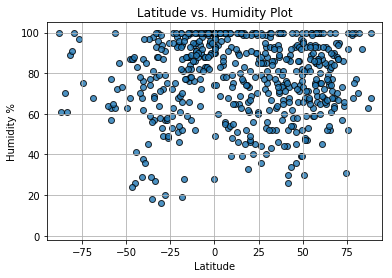

In [51]:
plt.scatter(city_weather_df['Latitude'], city_weather_df['humidity'], edgecolor='black', linewidths=1, alpha=0.8)
plt.xlim(-95, 95)
plt.ylim(-2, 105)
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Latitude vs. Humidity Plot")
plt.savefig('Images/latvshumidity.png')

#### Latitude vs. Cloudiness Plot

Text(0.5,1,'Latitude vs. Cloudiness')

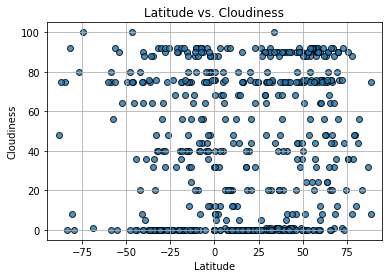

In [52]:
plt.scatter(city_weather_df['Latitude'], city_weather_df['cloudiness'], edgecolor='black', alpha=0.8, linewidths=1)
plt.xlim(-95, 95)
plt.ylim(-5, 105)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('Images/latvsclouds.png')
plt.title('Latitude vs. Cloudiness')

#### Latitude vs. Wind Speed Plot

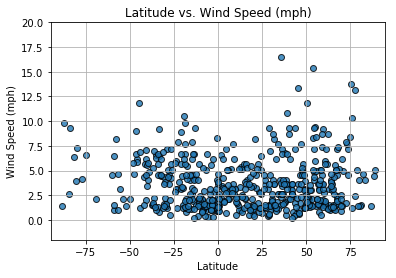

In [55]:
plt.scatter(city_weather_df['Latitude'], city_weather_df['wind_speed'], edgecolor='black', alpha=0.8, linewidths=1)
plt.xlim(-95, 95)
plt.ylim(-2, 20)
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed (mph)')
plt.savefig('Images/latvswind.png')